In [2]:
%pip install ucimlrepo
#!/usr/bin/env python3
%pip install matplotlib seaborn
%pip install pandas numpy


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [4]:
from ucimlrepo import fetch_ucirepo 

iris = fetch_ucirepo(id=53)

In [5]:
df = iris.data.features.copy()
df['target'] = iris.data.targets
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Análisis exploratorio de datos (EDA)
print("Dimensiones del dataset:", df.shape)
print("Columnas:", df.columns.tolist())


Dimensiones del dataset: (150, 5)
Columnas: ['sepal length', 'sepal width', 'petal length', 'petal width', 'target']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   target        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.50000

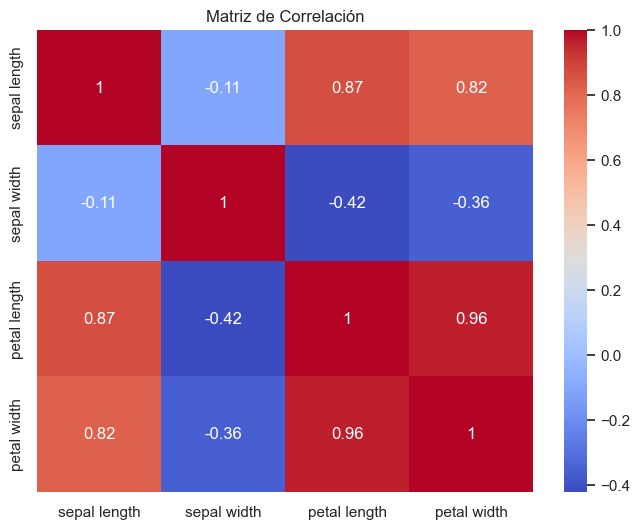

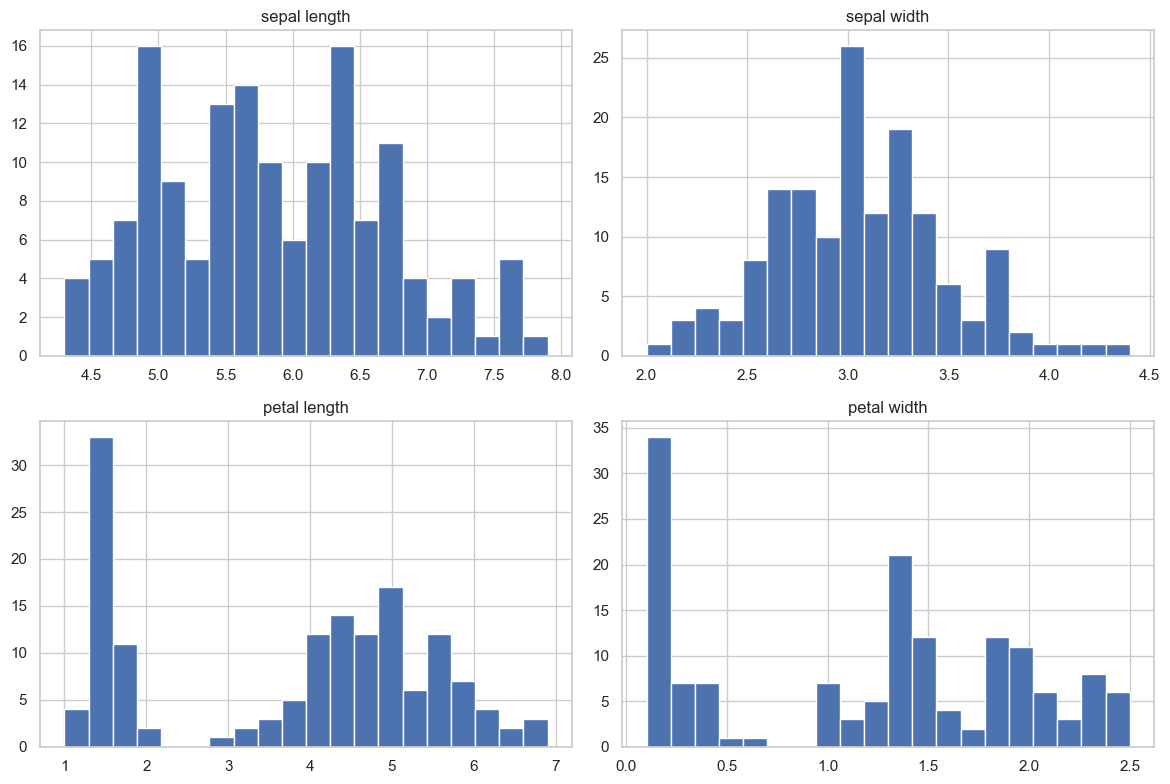

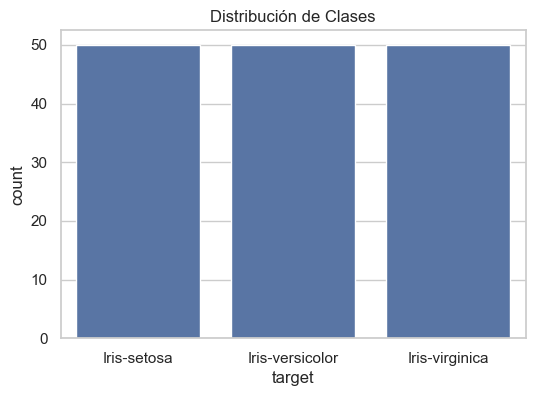

In [7]:
# grafica la normalidad de los datos
print(df.info())
print(df.describe())
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()
df.hist(bins=20, figsize=(12,8))
plt.tight_layout()
plt.show()
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df)
plt.title("Distribución de Clases")
plt.show()


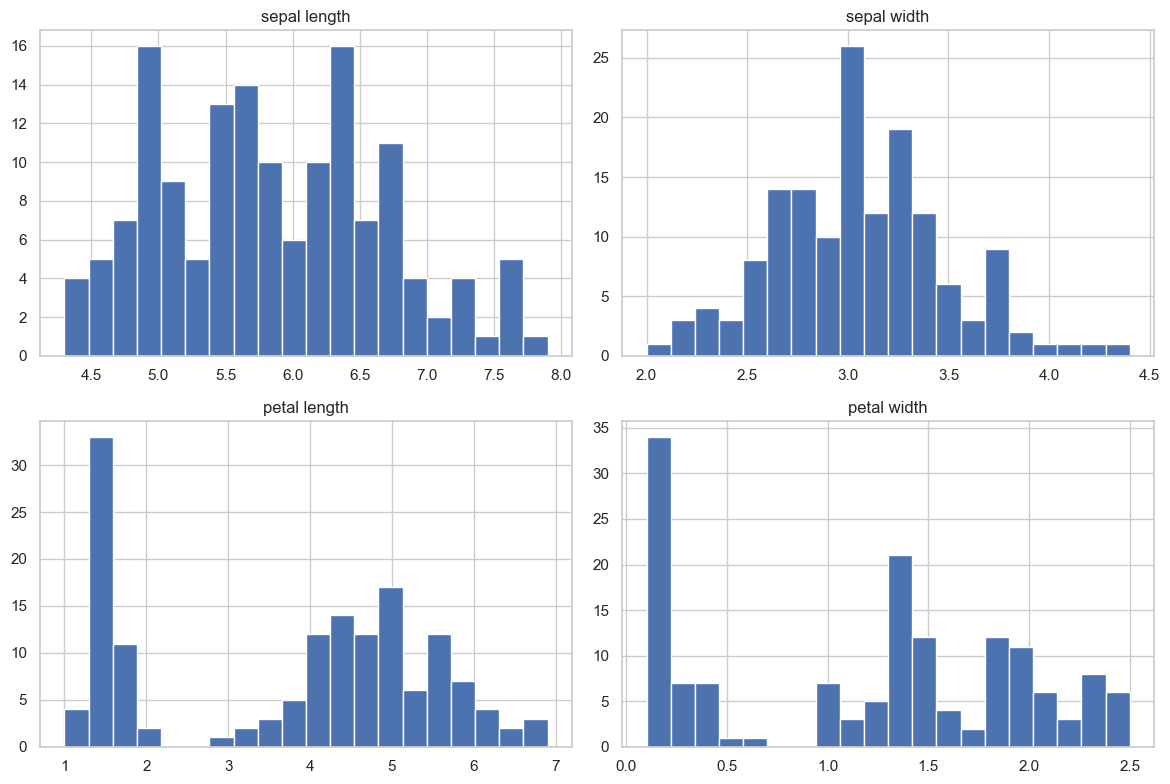

In [8]:
df.hist(bins=20, figsize=(12,8))
plt.tight_layout()
plt.show()

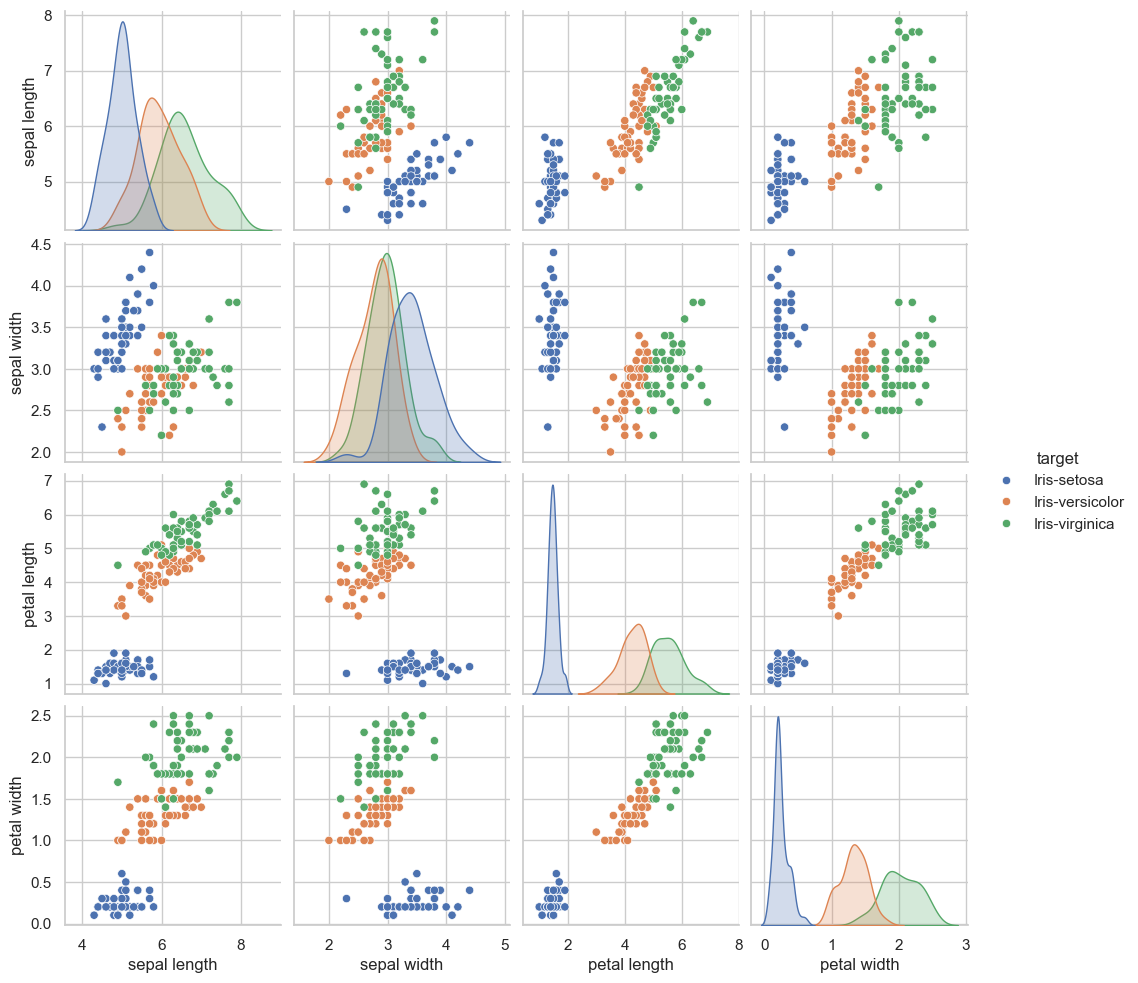

In [9]:
sns.pairplot(df, hue='target')
plt.show()

A continuacion ejemplo de entrenamiento de la red neuronal

In [ ]:
# 0) Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo


Epoch   1 | loss=1.0132 | acc=0.286
Epoch  10 | loss=0.9247 | acc=0.638
Epoch  20 | loss=0.8326 | acc=0.638
Epoch  30 | loss=0.7444 | acc=0.676
Epoch  40 | loss=0.6520 | acc=0.752
Epoch  50 | loss=0.5869 | acc=0.819
Epoch  60 | loss=0.5163 | acc=0.886
Epoch  70 | loss=0.4487 | acc=0.895
Epoch  80 | loss=0.3911 | acc=0.905
Epoch  90 | loss=0.3483 | acc=0.943
Epoch 100 | loss=0.2884 | acc=0.933
Epoch 110 | loss=0.2550 | acc=0.943
Epoch 120 | loss=0.2237 | acc=0.943
Epoch 130 | loss=0.2106 | acc=0.952
Epoch 140 | loss=0.1922 | acc=0.962
Epoch 150 | loss=0.1690 | acc=0.971
Epoch 160 | loss=0.1566 | acc=0.971
Epoch 170 | loss=0.1491 | acc=0.971
Epoch 180 | loss=0.1320 | acc=0.971
Epoch 190 | loss=0.1346 | acc=0.971
Epoch 200 | loss=0.1256 | acc=0.971
Accuracy test: 0.956


In [11]:
# 1) Cargar datos (Iris) y preparar
iris = fetch_ucirepo(id=53)
X = iris.data.features.to_numpy()
y = iris.data.targets.to_numpy()
if y.ndim > 1:
    y = y.ravel()

# estandarizar (media 0, std 1) - ok para tu MLP
X = (X - X.mean(axis=0)) / X.std(axis=0)

# split estratificado 
def stratified_split(X, y, test_size=0.3, seed=42):
    rng = np.random.default_rng(seed)
    X = np.asarray(X); y = np.asarray(y)
    if y.ndim > 1: y = y.ravel()
    classes, y_idx = np.unique(y, return_inverse=True)
    train_idx, test_idx = [], []
    for c in range(len(classes)):
        idx_c = np.where(y_idx == c)[0]
        rng.shuffle(idx_c)
        n_test = int(len(idx_c) * test_size)
        test_idx.extend(idx_c[:n_test])
        train_idx.extend(idx_c[n_test:])
    train_idx, test_idx = np.array(train_idx), np.array(test_idx)
    rng.shuffle(train_idx); rng.shuffle(test_idx)
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = stratified_split(X, y, test_size=0.3, seed=7)

print("Train size:", len(y_train), "| Test size:", len(y_test))
print("Distribución train:")
for c in np.unique(y):
    print(f"  {c}: {(y_train==c).sum()}")
print("Distribución test:")
for c in np.unique(y):
    print(f"  {c}: {(y_test==c).sum()}")


Train size: 105 | Test size: 45
Distribución train:
  Iris-setosa: 35
  Iris-versicolor: 35
  Iris-virginica: 35
Distribución test:
  Iris-setosa: 15
  Iris-versicolor: 15
  Iris-virginica: 15


In [14]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# 2) Crear y entrenar tu modelo (tal cual lo tienes)
from Neural import NeuralNet  # Cambia NeuralNet por el nombre correcto de la clase

modelo = NeuralNet(
    learning_rate=0.01,
    activation_function='ReLu',
    layer_neurons=[8, 4],
    epoch=200,
    batch_size=16
)
modelo.fit(X_train, y_train)

# Predicciones
y_pred_idx = modelo.predict(X_test)

# Mapear y_test a índices
class_to_idx = {c:i for i,c in enumerate(modelo.classes)}
y_test_idx = np.array([class_to_idx[label] for label in y_test])

Epoch   1 | loss=1.1878 | acc=0.000
Epoch  10 | loss=1.1214 | acc=0.095
Epoch  20 | loss=1.1050 | acc=0.171
Epoch  30 | loss=1.0975 | acc=0.210
Epoch  40 | loss=1.0891 | acc=0.267
Epoch  50 | loss=1.0759 | acc=0.552
Epoch  60 | loss=1.0548 | acc=0.610
Epoch  70 | loss=0.9948 | acc=0.610
Epoch  80 | loss=0.8916 | acc=0.590
Epoch  90 | loss=0.7821 | acc=0.629
Epoch 100 | loss=0.7276 | acc=0.638
Epoch 110 | loss=0.6709 | acc=0.657
Epoch 120 | loss=0.6409 | acc=0.657
Epoch 130 | loss=0.6218 | acc=0.676
Epoch 140 | loss=0.6094 | acc=0.676
Epoch 150 | loss=0.5860 | acc=0.695
Epoch 160 | loss=0.5791 | acc=0.857
Epoch 170 | loss=0.5671 | acc=0.876
Epoch 180 | loss=0.5396 | acc=0.867
Epoch 190 | loss=0.5354 | acc=0.876
Epoch 200 | loss=0.5223 | acc=0.867


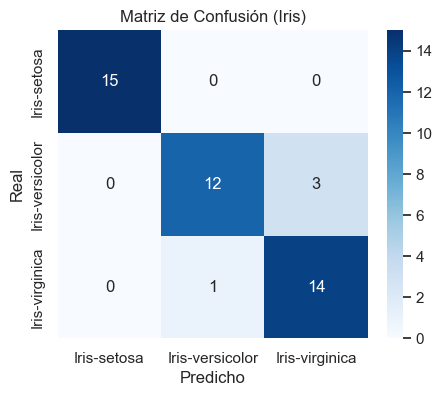

In [20]:
cm = confusion_matrix(y_test_idx, y_pred_idx)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=modelo.classes, 
            yticklabels=modelo.classes)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión (Iris)")
plt.show()


In [27]:
print("Accuracy:", accuracy_score(y_test_idx, y_pred_idx))
print("\nReporte de Clasificación:\n")
print(classification_report(y_test_idx, y_pred_idx, target_names=modelo.classes, digits=3))


Accuracy: 0.8222222222222222

Reporte de Clasificación:

                 precision    recall  f1-score   support

    Iris-setosa      1.000     1.000     1.000        15
Iris-versicolor      0.889     0.533     0.667        15
 Iris-virginica      0.667     0.933     0.778        15

       accuracy                          0.822        45
      macro avg      0.852     0.822     0.815        45
   weighted avg      0.852     0.822     0.815        45

